In [3]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set_style('darkgrid')

In [57]:
# loading data
dataframe = pd.read_csv('diabetes.csv')
new_dataframe=dataframe
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Introduction

Let us  do some EDA to see behaviour of data which will help in Preprocessing.

In [5]:
print("Shape of Dataset is ==> ",dataframe.shape)

Shape of Dataset is ==>  (768, 9)


In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Data Cleaning

In [8]:
for columns in dataframe.columns:
    print(columns)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


Changing coloumn name of DiabtesPedigreeFunction to DF.

In [9]:
# renaming the column name
dataframe.rename({'DiabetesPedigreeFunction':'DF'},inplace = True,axis =1)
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Checking of dataTypes

In [10]:
dataframe.dtypes

Pregnancies        int64
Glucose            int64
BloodPressure      int64
SkinThickness      int64
Insulin            int64
BMI              float64
DF               float64
Age                int64
Outcome            int64
dtype: object

# Preprocessing

You might get confuse what is difference between Data Cleaning and Data Preprocessing?

Well Data Preprocessing is beyong Data Cleaning is used to Make data tidy. Data Preprocessing is used to make data in way such that we can fit model to it.

## Missing Values & Outliers

Let us look to missing values and handle them. 
First I create function to handle outliers.Standard deviation based detection.

In [11]:
def standard_based(column_name,dataframe):
    mean_dataSet = dataframe[column_name].mean()
    std_dataSet = dataframe[column_name].std()
    cut_off_value = std_dataSet * 3
    lower_value, upper_value = mean_dataSet - cut_off_value, mean_dataSet + cut_off_value
    new_dataframe = dataframe[(dataframe[column_name] < upper_value) & (dataframe[column_name] > lower_value)]
    return new_dataframe

In [12]:
dataframe.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DF               0
Age              0
Outcome          0
dtype: int64

In [13]:
dataframe['Pregnancies'].describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

We can see that minimum is 0 which may be considered as no Pregnancy, But maximum is 17 which is not making sense. Let us see distribution and also boxplot for outliers

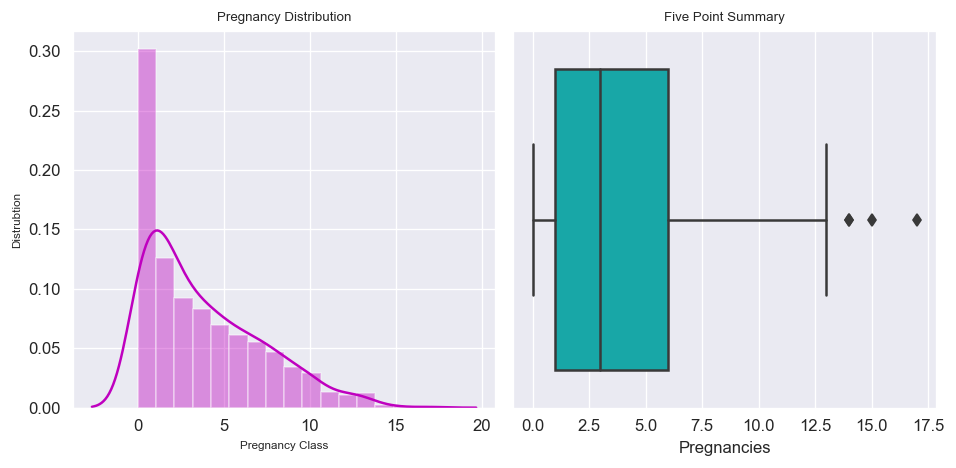

In [17]:
fig,axies = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

p00=sns.distplot(dataframe['Pregnancies'],ax=axies[0],color='m')
axies[0].set_title('Pregnancy Distribution',fontdict={'fontsize':8})
axies[0].set_xlabel('Pregnancy Class',fontdict={'fontsize':7})
axies[0].set_ylabel('Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


p01=sns.boxplot('Pregnancies',data=dataframe,ax=axies[1],orient = 'v',color='c')
axies[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

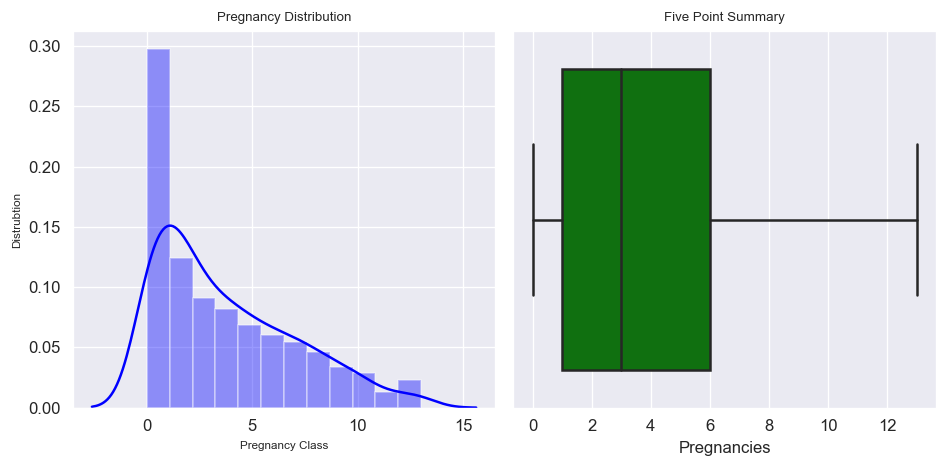

In [21]:
#Treating Outlier and then verifying it

dataframe = standard_based('Pregnancies',dataframe)

fig,axies = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

p00=sns.distplot(dataframe['Pregnancies'],ax=axies[0],color='blue')
axies[0].set_title('Pregnancy Distribution',fontdict={'fontsize':8})
axies[0].set_xlabel('Pregnancy Class',fontdict={'fontsize':7})
axies[0].set_ylabel('Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


p01=sns.boxplot('Pregnancies',data=dataframe,ax=axies[1],orient = 'v',color='green')
axies[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [22]:
dataframe['Glucose'].describe()

count    764.000000
mean     120.776178
std       31.946234
min        0.000000
25%       99.000000
50%      117.000000
75%      140.000000
max      199.000000
Name: Glucose, dtype: float64

<font color = 'blue'> Glucose = 0, does not make any sense. </font>

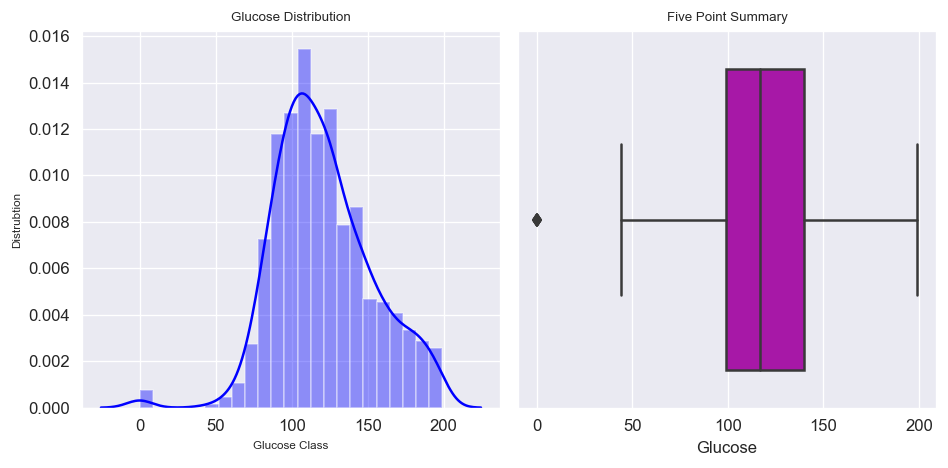

In [23]:
fig,axies = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

p00=sns.distplot(dataframe['Glucose'],ax=axies[0],color='b')
axies[0].set_title('Glucose Distribution',fontdict={'fontsize':8})
axies[0].set_xlabel('Glucose Class',fontdict={'fontsize':7})
axies[0].set_ylabel('Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


p01=sns.boxplot('Glucose',data=dataframe,ax=axies[1],orient = 'v',color='m')
axies[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

<font color = 'blue'> There is no outlier and also distribution is normal , So i will treat 0 with mean value.</font>

In [25]:
dataframe.Glucose = dataframe.Glucose.replace(0,dataframe.Glucose.mean())
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DF,Age,Outcome
0,6,148.0,72,35,0,33.6,0.627,50,1
1,1,85.0,66,29,0,26.6,0.351,31,0
2,8,183.0,64,0,0,23.3,0.672,32,1
3,1,89.0,66,23,94,28.1,0.167,21,0
4,0,137.0,40,35,168,43.1,2.288,33,1


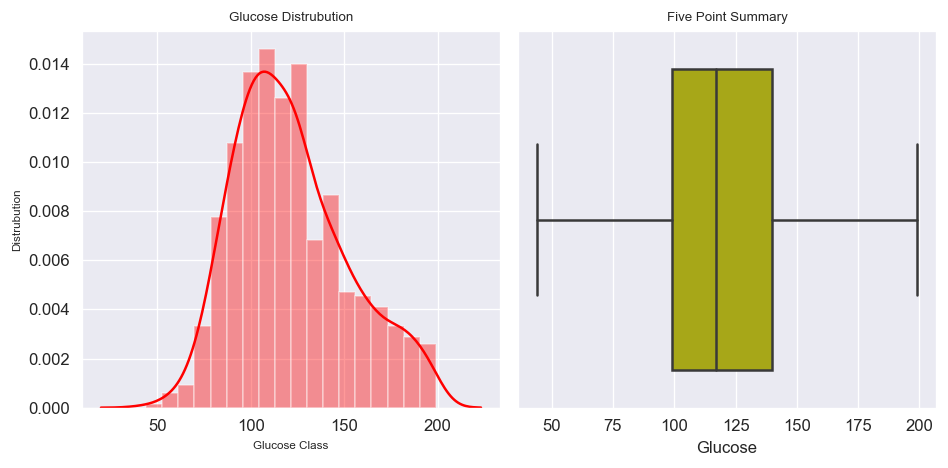

In [26]:
fig,axies = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

p00=sns.distplot(dataframe['Glucose'],ax=axies[0],color='r')
axies[0].set_title('Glucose Distrubution',fontdict={'fontsize':8})
axies[0].set_xlabel('Glucose Class',fontdict={'fontsize':7})
axies[0].set_ylabel('Distrubution',fontdict={'fontsize':7})
plt.tight_layout()


p01=sns.boxplot('Glucose',data=dataframe,ax=axies[1],orient = 'v',color='y')
axies[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [27]:
dataframe.BloodPressure.describe()

count    764.000000
mean      69.098168
std       19.401789
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

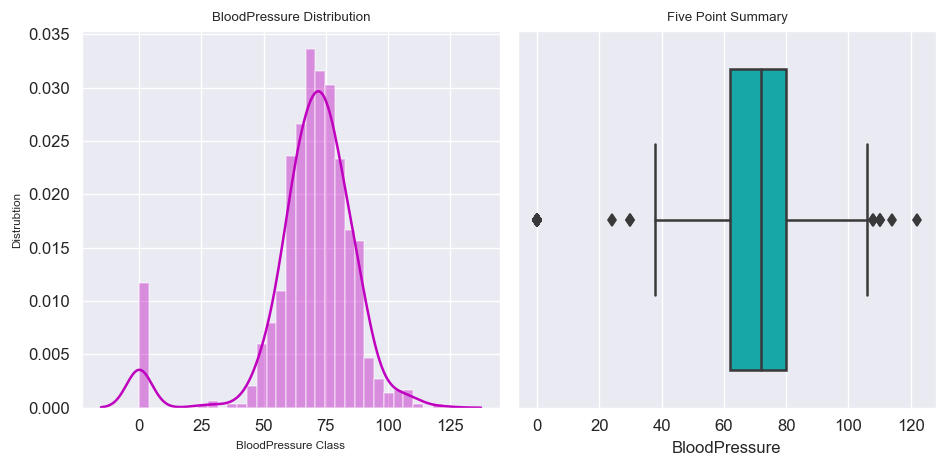

In [28]:
fig,axies = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

p00=sns.distplot(dataframe['BloodPressure'],ax=axies[0],color='m')
axies[0].set_title('BloodPressure Distribution',fontdict={'fontsize':8})
axies[0].set_xlabel('BloodPressure Class',fontdict={'fontsize':7})
axies[0].set_ylabel('Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


p01=sns.boxplot('BloodPressure',data=dataframe,ax=axies[1],orient = 'v',color='c')
axies[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

It looks like there are few Outliers at both higher end and lower end. But at higher end maximum BP is 122, So it is considerable. Now at lower end BP near 25 is not making sense. So i will treat missing value with medium and then i will also treat outliers.

In [29]:
dataframe.BloodPressure = dataframe.BloodPressure.replace(0,dataframe.BloodPressure.median())
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DF,Age,Outcome
0,6,148.0,72,35,0,33.6,0.627,50,1
1,1,85.0,66,29,0,26.6,0.351,31,0
2,8,183.0,64,0,0,23.3,0.672,32,1
3,1,89.0,66,23,94,28.1,0.167,21,0
4,0,137.0,40,35,168,43.1,2.288,33,1


In [30]:
dataframe  = standard_based('BloodPressure',dataframe)

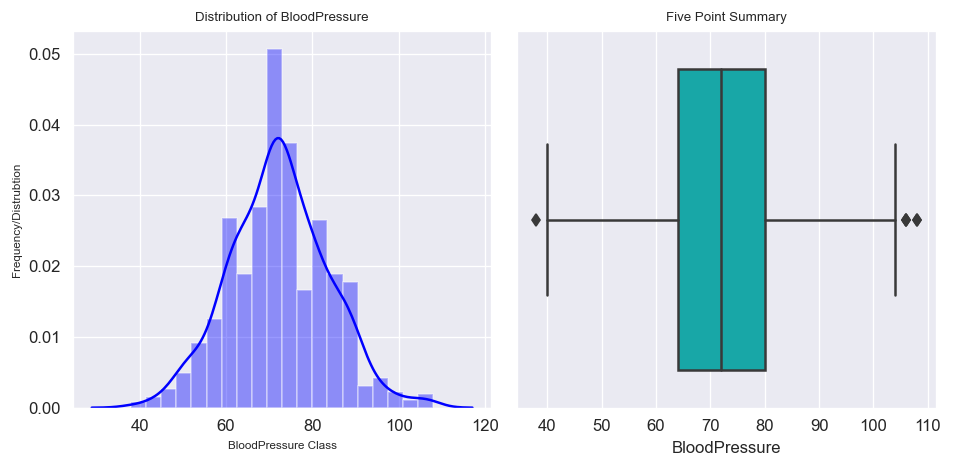

In [31]:
fig,axies = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

p00=sns.distplot(dataframe['BloodPressure'],ax=axies[0],color='b')
axies[0].set_title('BloodPressure Distribution',fontdict={'fontsize':8})
axies[0].set_xlabel('BloodPressure Class',fontdict={'fontsize':7})
axies[0].set_ylabel('Distrubution',fontdict={'fontsize':7})
plt.tight_layout()


p01=sns.boxplot('BloodPressure',data=dataframe,ax=axies[1],orient = 'v',color='c')
axies[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

Well , Let us see next one.

In [32]:
dataframe.SkinThickness.describe()

count    756.000000
mean      20.428571
std       15.952377
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

Let us look at 0 SkinThickness.

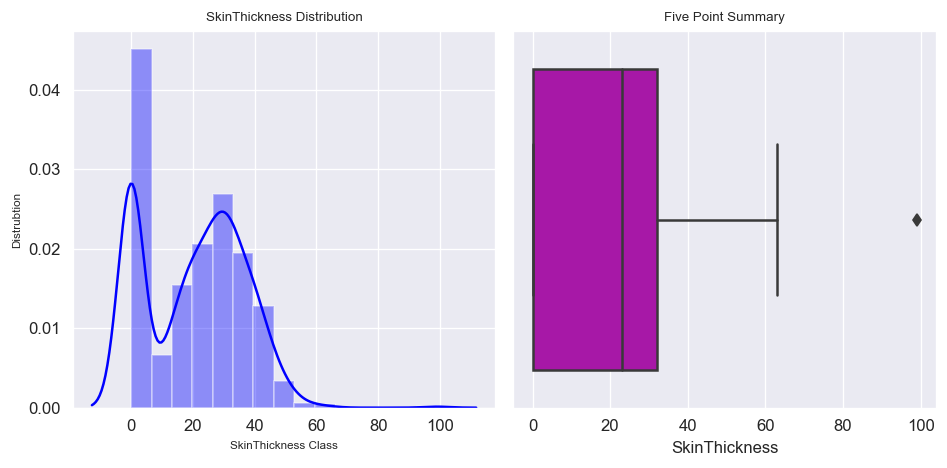

In [33]:
fig,axies = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

p00=sns.distplot(dataframe['SkinThickness'],ax=axies[0],color='b')
axies[0].set_title('SkinThickness Distribution',fontdict={'fontsize':8})
axies[0].set_xlabel('SkinThickness Class',fontdict={'fontsize':7})
axies[0].set_ylabel('Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


p01=sns.boxplot('SkinThickness',data=dataframe,ax=axies[1],orient = 'v',color='m')
axies[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [34]:
dataframe.SkinThickness = dataframe.SkinThickness.replace(0,dataframe.SkinThickness.mean())
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DF,Age,Outcome
0,6,148.0,72,35.000000,0,33.6,0.627,50,1
1,1,85.0,66,29.000000,0,26.6,0.351,31,0
2,8,183.0,64,20.428571,0,23.3,0.672,32,1
3,1,89.0,66,23.000000,94,28.1,0.167,21,0
4,0,137.0,40,35.000000,168,43.1,2.288,33,1


In [35]:
dataframe = standard_based("SkinThickness",dataframe)

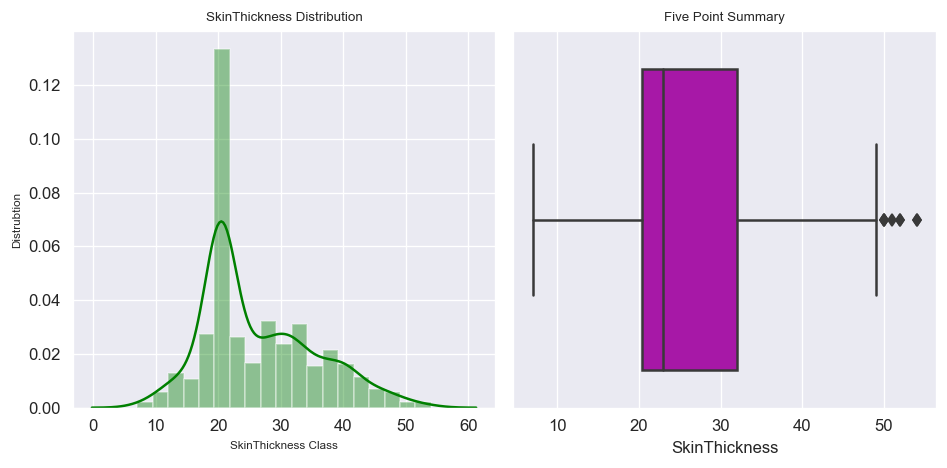

In [36]:
fig,axies = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

p00=sns.distplot(dataframe['SkinThickness'],ax=axies[0],color='green')
axies[0].set_title('SkinThickness Distribution',fontdict={'fontsize':8})
axies[0].set_xlabel('SkinThickness Class',fontdict={'fontsize':7})
axies[0].set_ylabel('Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


p01=sns.boxplot('SkinThickness',data=dataframe,ax=axies[1],orient = 'v',color='m')
axies[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

**Can you see , I am using plot twice one before treating and another after treatment. Look at changes :), Let us see next variable.**

In [37]:
dataframe.Insulin.describe()

count    752.000000
mean      79.889628
std      115.995453
min        0.000000
25%        0.000000
50%       26.000000
75%      128.250000
max      846.000000
Name: Insulin, dtype: float64

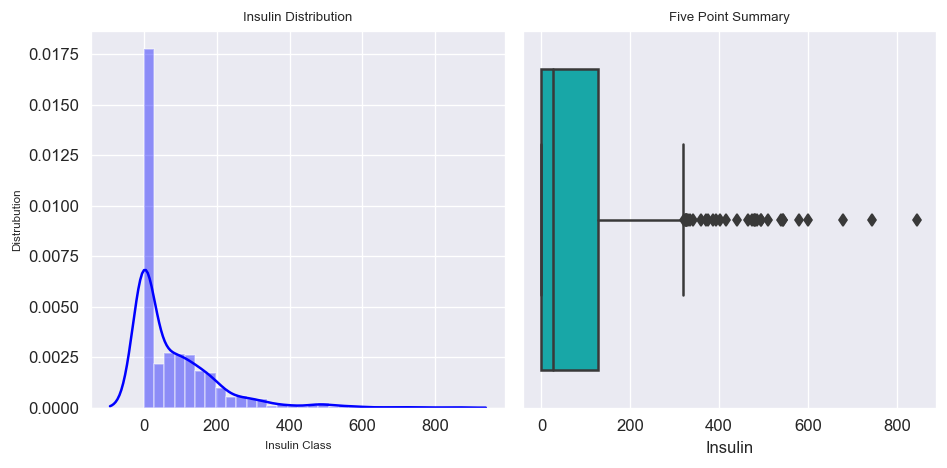

In [38]:
fig,axies = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

p00=sns.distplot(dataframe['Insulin'],ax=axies[0],color='b')
axies[0].set_title('Insulin Distribution',fontdict={'fontsize':8})
axies[0].set_xlabel('Insulin Class',fontdict={'fontsize':7})
axies[0].set_ylabel('Distrubution',fontdict={'fontsize':7})
plt.tight_layout()


p01=sns.boxplot('Insulin',data=dataframe,ax=axies[1],orient = 'v',color='c')
axies[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

**We can see there are many outliers. So i will fill 0 with Median of Insulin. I will also treat Outliers after removing zero.**

In [39]:
dataframe.Insulin = dataframe.Insulin.replace(0,dataframe.Insulin.median())
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DF,Age,Outcome
0,6,148.0,72,35.000000,26,33.6,0.627,50,1
1,1,85.0,66,29.000000,26,26.6,0.351,31,0
2,8,183.0,64,20.428571,26,23.3,0.672,32,1
3,1,89.0,66,23.000000,94,28.1,0.167,21,0
4,0,137.0,40,35.000000,168,43.1,2.288,33,1


In [40]:
dataframe = standard_based('Insulin',dataframe)

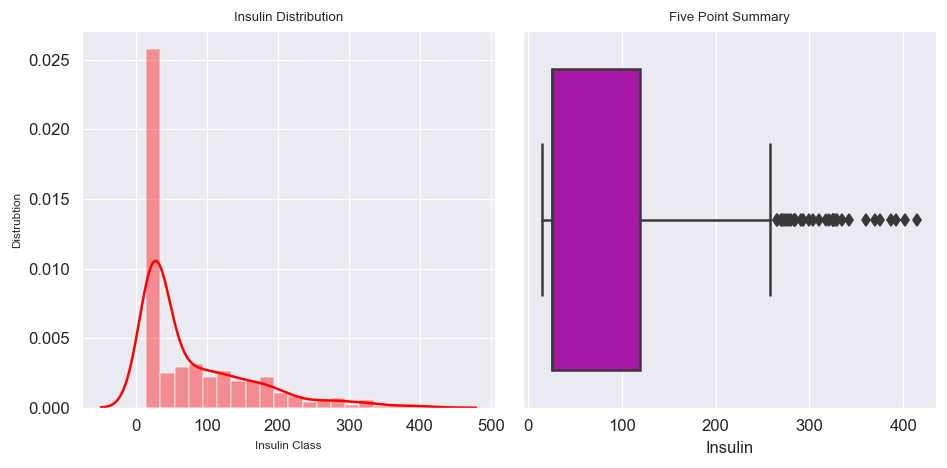

In [41]:
fig,axies = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

p00=sns.distplot(dataframe['Insulin'],ax=axies[0],color='r')
axies[0].set_title('Insulin Distribution',fontdict={'fontsize':8})
axies[0].set_xlabel('Insulin Class',fontdict={'fontsize':7})
axies[0].set_ylabel('Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Insulin',data=dataframe,ax=axies[1],orient = 'v',color='m')
axies[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

**Please observe the scale at Y axis to see if outliers has been treated to some extent :) **

In [42]:
dataframe.BMI.describe()

count    734.000000
mean      31.649728
std        7.630830
min        0.000000
25%       27.025000
50%       32.000000
75%       36.100000
max       57.300000
Name: BMI, dtype: float64

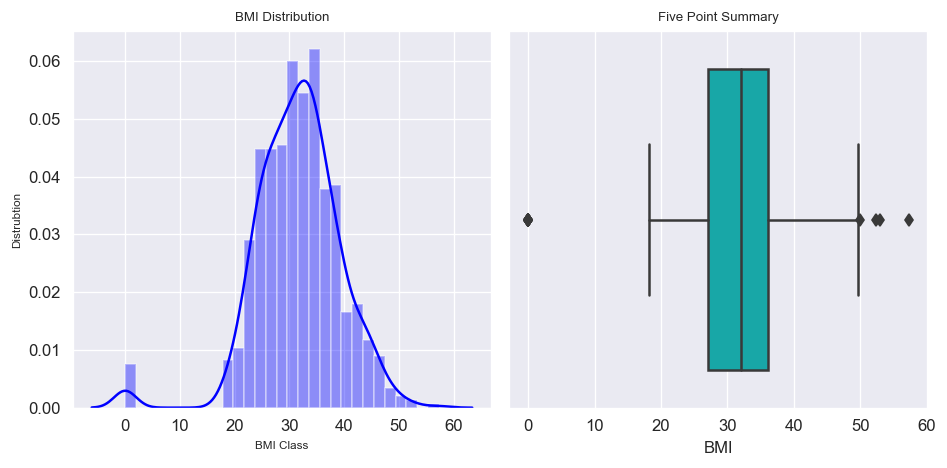

In [43]:
fig,axies = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

p00=sns.distplot(dataframe['BMI'],ax=axies[0],color='b')
axies[0].set_title('BMI Distribution',fontdict={'fontsize':8})
axies[0].set_xlabel('BMI Class',fontdict={'fontsize':7})
axies[0].set_ylabel('Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


p01=sns.boxplot('BMI',data=dataframe,ax=axies[1],orient = 'v',color='c')
axies[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

** Outliers are considerable, So i will replace zero with mean. **

In [44]:
dataframe.BMI = dataframe.BMI.replace(0,dataframe.BMI.mean())
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DF,Age,Outcome
0,6,148.0,72,35.000000,26,33.6,0.627,50,1
1,1,85.0,66,29.000000,26,26.6,0.351,31,0
2,8,183.0,64,20.428571,26,23.3,0.672,32,1
3,1,89.0,66,23.000000,94,28.1,0.167,21,0
4,0,137.0,40,35.000000,168,43.1,2.288,33,1


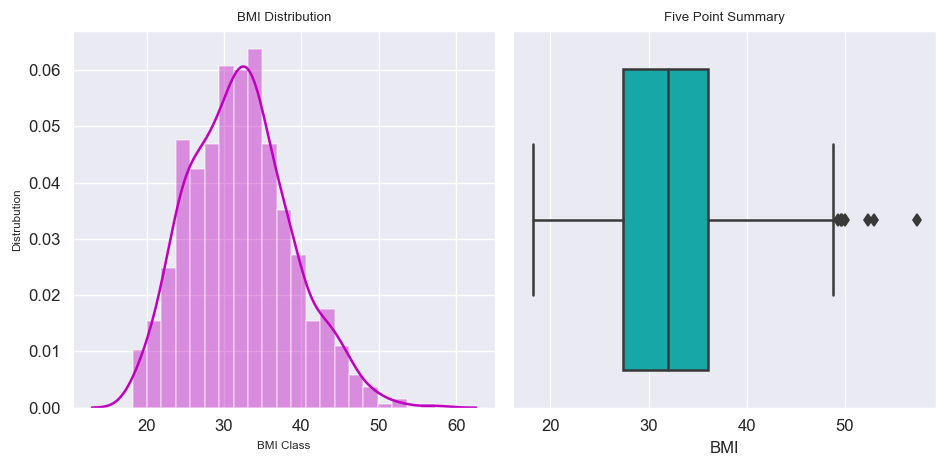

In [45]:
fig,axies = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

p00=sns.distplot(dataframe['BMI'],ax=axies[0],color='m')
axies[0].set_title('BMI Distribution',fontdict={'fontsize':8})
axies[0].set_xlabel('BMI Class',fontdict={'fontsize':7})
axies[0].set_ylabel('Distrubution',fontdict={'fontsize':7})
plt.tight_layout()


p01=sns.boxplot('BMI',data=dataframe,ax=axies[1],orient = 'v',color='c')
axies[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [46]:
dataframe.DF.describe()

count    734.000000
mean       0.464274
std        0.313676
min        0.078000
25%        0.244000
50%        0.367000
75%        0.612750
max        2.288000
Name: DF, dtype: float64

Well things is fine here, Let us see for Outliers.

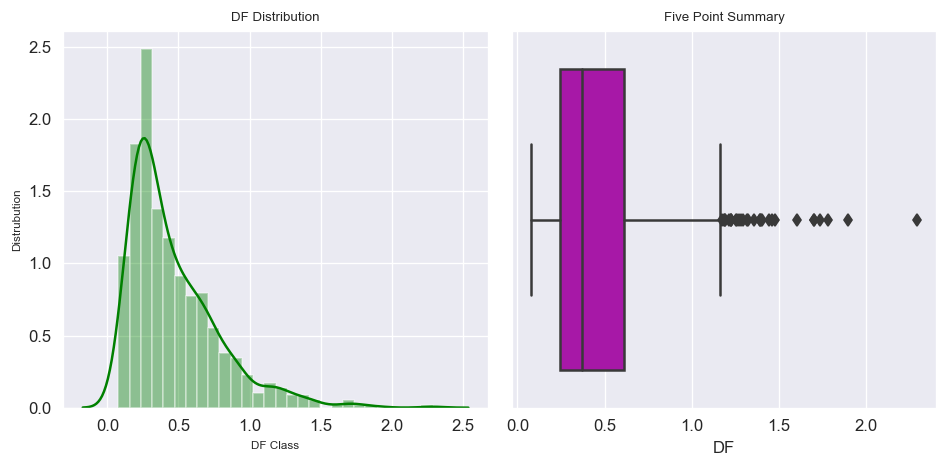

In [48]:
fig,axies = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

p00=sns.distplot(dataframe['DF'],ax=axies[0],color='green')
axies[0].set_title('DF Distribution',fontdict={'fontsize':8})
axies[0].set_xlabel('DF Class',fontdict={'fontsize':7})
axies[0].set_ylabel('Distrubution',fontdict={'fontsize':7})
plt.tight_layout()


p01=sns.boxplot('DF',data=dataframe,ax=axies[1],orient = 'v',color='m')
axies[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

Outliers are present at higher end. Let us treat them.

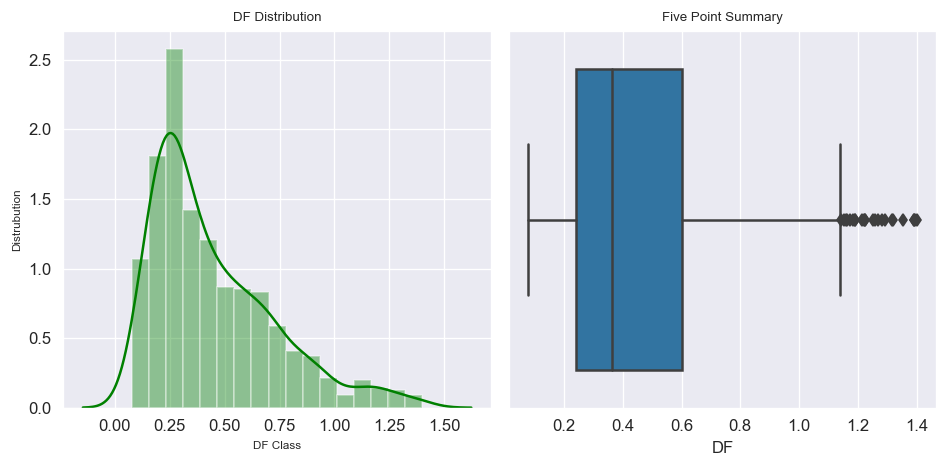

In [49]:
dataframe = standard_based('DF',dataframe)

fig,axies = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

p00=sns.distplot(dataframe['DF'],ax=axies[0],color='green')
axies[0].set_title('DF Distribution',fontdict={'fontsize':8})
axies[0].set_xlabel('DF Class',fontdict={'fontsize':7})
axies[0].set_ylabel('Distrubution',fontdict={'fontsize':7})
plt.tight_layout()


p01=sns.boxplot('DF',data=dataframe,ax=axies[1],orient = 'v')
axies[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [50]:
dataframe.Age.describe()

count    724.000000
mean      33.111878
std       11.711371
min       21.000000
25%       24.000000
50%       29.000000
75%       40.000000
max       81.000000
Name: Age, dtype: float64

Let us take a look for outliers.

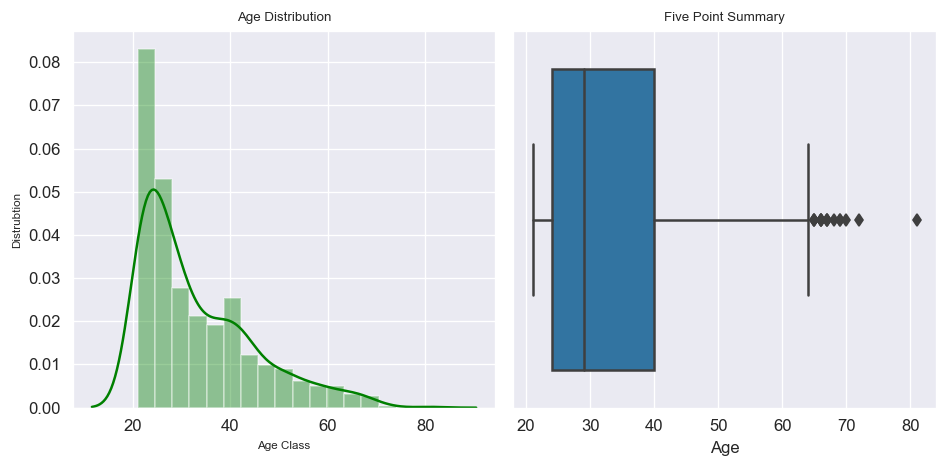

In [51]:
fig,axies = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

p00=sns.distplot(dataframe['Age'],ax=axies[0],color='green')
axies[0].set_title('Age Distribution',fontdict={'fontsize':8})
axies[0].set_xlabel('Age Class',fontdict={'fontsize':7})
axies[0].set_ylabel('Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


p01=sns.boxplot('Age',data=dataframe,ax=axies[1],orient = 'v')
axies[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

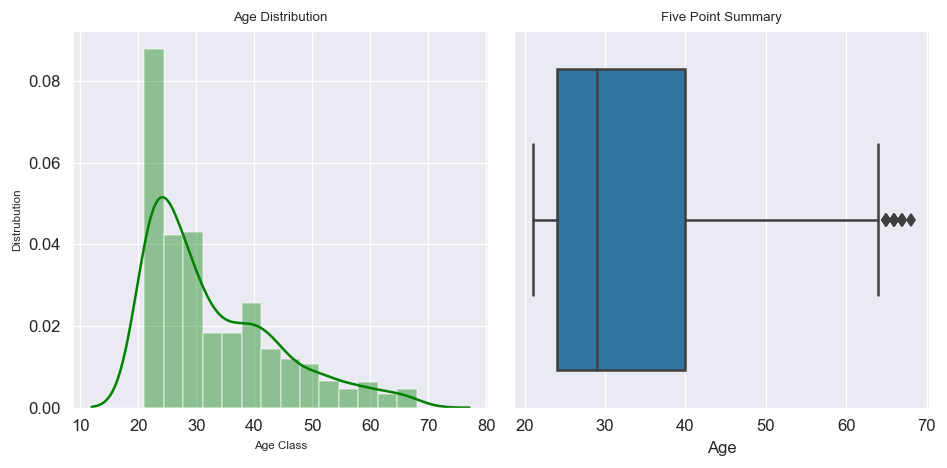

In [52]:
dataframe = standard_based('Age',dataframe)

fig,axies = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

p00=sns.distplot(dataframe['Age'],ax=axies[0],color='green')
axies[0].set_title('Age Distribution',fontdict={'fontsize':8})
axies[0].set_xlabel('Age Class',fontdict={'fontsize':7})
axies[0].set_ylabel('Distrubution',fontdict={'fontsize':7})
plt.tight_layout()


p01=sns.boxplot('Age',data=dataframe,ax=axies[1],orient = 'v')
axies[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

## Statistical Assumption



In [54]:
dataframe.var()

Pregnancies        10.704623
Glucose           872.795253
BloodPressure     128.731754
SkinThickness      80.891303
Insulin          6387.167685
BMI                42.768611
DF                  0.077433
Age               127.254326
Outcome             0.223604
dtype: float64

In [55]:
dataframe.drop('DF',axis = 1,inplace=True)

### Inferential Statistical Analysis

In [56]:
#to calculate proportion
class Proportion:
    def __init__(self,n_yes,n,z):
        """Z multiplier from appropriate distribution based on desired confidence level and sample design"""
        self.n_yes = n_yes
        self.n=n
        self.z=z
        self.best_estimate = round(n_yes/n,2)
        
    def estimated_standard_error(self):
        import numpy as np
        return np.sqrt((self.best_estimate*(1-self.best_estimate))/self.n)
    
    def margin_of_error(self):
        return self.z*self.estimated_standard_error()

    def proportion(self):
        lcb = self.best_estimate - (self.z*self.estimated_standard_error())
        ucb = self.best_estimate + (self.z*self.estimated_standard_error())
        return (lcb,ucb)

#to calculate mean
class Mean:
    import numpy as np
    def __init__(self,mean,std,n,t):
        '''t multiplier comes from t distribution with n-1 degree of freedom'''
        self.best_estimate = mean
        self.std = std
        self.n = n
        self.t = t
        self.estimated_se = self.std / np.sqrt(self.n)
        
    def moe(self):
        return self.t * self.estimated_se
    
    def mean(self):
        lcb = self.best_estimate - self.moe()
        ucb = self.best_estimate + self.moe()
        return (lcb,ucb)

#to calculate difference in mean
class diffMean:
    import numpy as np
    def __init__(self,x1,x2,std1,std2,n1,n2,t):
        '''t multiplier comes from t distribution with appropriate degree of freedom'''        
        self.best_estimate1 = x1
        self.best_estimate2 = x2
        self.std1 = std1
        self.std2 = std2
        self.n1 = n1
        self.n2 = n2
        self.t = t
        self.pooled_estimated_se = np.sqrt((np.sqrt(((self.n1-1)*(self.std1**2) + (self.n2-1)*(self.std2**2)) / ((self.n1+self.n2)-2))) * (np.sqrt((1/self.n1)+(1/self.n2))))
        self.unpooled_estimated_se = np.sqrt(((self.std1**2)/self.n1) + ((self.std2**2)/self.n2))
        
    def pooledMoe(self):
        return (self.t)*(self.pooled_estimated_se)
    
    def pooledMean(self):
        lcb = (self.best_estimate1 - self.best_estimate2) - self.pooledMoe()
        ucb = (self.best_estimate1 - self.best_estimate2) + self.pooledMoe()
        return (lcb,ucb)
    
    def unpooledMoe(self):
        return self.t * self.unpooled_estimated_se
    
    def unpooledMean(self):
        lcb = (self.best_estimate1 - self.best_estimate2) - self.unpooledMoe()
        ucb = (self.best_estimate1 - self.best_estimate2) + self.unpooledMoe()
        return (lcb,ucb)

In [59]:
# Finding out diabetes people from given data
new_dataframe.Outcome.replace({0:'Non-Diab',1:'Diab'},inplace=True)
print(new_dataframe.Outcome.value_counts())

Non-Diab    500
Diab        268
Name: Outcome, dtype: int64


In [63]:
new = new_dataframe.shape[0]
diabetic_patient = new_dataframe.Outcome.value_counts().loc['Diab']

print("Number of total observation are:",new)
print("Number of Diabetic Patient are:",diabetic_patient)

#Let us construct a 95% CI using our written code
#I am using z=1.96 for 95% C.I.
diabetic_pro = Proportion(diabetic_patient, new ,1.96)

print("\nPrinting calculated values...")
print("People with Diabetes Estimated  Proportion   is:", diabetic_pro.best_estimate*100)
print("People with Diabetes Estimated Standard Error Proportion  is:",diabetic_pro.estimated_standard_error())
print("People with Diabetes Margin of Error  Proportion  is:",diabetic_pro.margin_of_error())
print("People with Diabetes 95% Confidence Interval  Proportion  is:",diabetic_pro.proportion())

Number of total observation are: 768
Number of Diabetic Patient are: 268

Printing calculated values...
People with Diabetes Estimated  Proportion   is: 35.0
People with Diabetes Estimated Standard Error Proportion  is: 0.017211157960269067
People with Diabetes Margin of Error  Proportion  is: 0.03373386960212737
People with Diabetes 95% Confidence Interval  Proportion  is: (0.3162661303978726, 0.38373386960212735)


In [64]:
#Let us now calculate same thing using statsmodel
import statsmodels.api as sm
print("\n People with Diabetes 95% Confidence Interval  Proportion is:",sm.stats.proportion_confint(diabetic_patient, new))


 People with Diabetes 95% Confidence Interval  Proportion is: (0.3152483405027714, 0.38266832616389523)


In [65]:
#Finding out average month pregnancy for daiabetic patients
dataframe_diabetic = new_dataframe[new_dataframe.Outcome=='Diab']
dataframe_diabetic.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diab
2,8,183,64,0,0,23.3,0.672,32,Diab
4,0,137,40,35,168,43.1,2.288,33,Diab
6,3,78,50,32,88,31.0,0.248,26,Diab
8,2,197,70,45,543,30.5,0.158,53,Diab


In [66]:
mean_pregnancies_diabetic = Mean(dataframe_diabetic['Pregnancies'].mean(),dataframe_diabetic['Pregnancies'].std(),dataframe_diabetic.shape[0],1.962)
print("\nPrinting values...")
print("Best point estimate :", mean_pregnancies_diabetic.best_estimate)
print("Estimated Standard Error :",mean_pregnancies_diabetic.estimated_se)
print("Margin of Error for Mean Pregnancy :",mean_pregnancies_diabetic.moe())
print("95% Confidence Interval for Mean Pregnancy :",mean_pregnancies_diabetic.mean(),"\n")


Printing values...
Best point estimate : 4.865671641791045
Estimated Standard Error : 0.2285325476073356
Margin of Error for Mean Pregnancy : 0.44838085840559244
95% Confidence Interval for Mean Pregnancy : (4.417290783385453, 5.314052500196637) 



In [67]:
#Let us now calculate same thing using statsmodel
print("\n95% C.I. with statsmodels library:",sm.stats.DescrStatsW(dataframe_diabetic['Pregnancies']).zconfint_mean())


95% C.I. with statsmodels library: (4.417756079185482, 5.313587204396608)


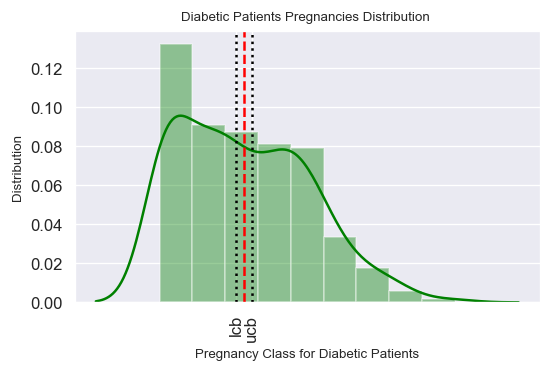

In [69]:
#let us make some figure to interpret the result
plt.figure(dpi=120,figsize=(5,3))
sns.distplot(dataframe_diabetic['Pregnancies'],color='green')
plt.axvline(x=4.417756079185482,color = 'black',ls=':')
plt.axvline(x=5.313587204396608,color = 'black',ls=':')
plt.axvline(x=mean_pregnancies_diabetic.best_estimate,color='red',ls='--')
plt.xticks([4.417756079185482,5.313587204396608],['lcb','ucb'],rotation=90)
plt.xlabel('Pregnancy Class for Diabetic Patients',fontdict={'fontsize':8})
plt.ylabel('Distribution',fontdict={'fontsize':8})
plt.title('Diabetic Patients Pregnancies Distribution ',fontdict={'fontsize':8}) 
plt.show()

In [71]:
#Finding out average month pregnancy for NON-daiabetic patients
dataframe_non_diabetic = new_dataframe[new_dataframe.Outcome=='Non-Diab']
dataframe_non_diabetic.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,Non-Diab
3,1,89,66,23,94,28.1,0.167,21,Non-Diab
5,5,116,74,0,0,25.6,0.201,30,Non-Diab
7,10,115,0,0,0,35.3,0.134,29,Non-Diab
10,4,110,92,0,0,37.6,0.191,30,Non-Diab


In [72]:
print("\nPrinting Calculations...")
mean_pregnancies_non_diabetic = Mean(dataframe_non_diabetic['Pregnancies'].mean(),dataframe_non_diabetic['Pregnancies'].std(),dataframe_non_diabetic.shape[0],1.962)
print("Best point estimate for Mean Pregnancy :", mean_pregnancies_non_diabetic.best_estimate)
print("Estimated Standard Error for Mean Pregnancy :",mean_pregnancies_non_diabetic.estimated_se)
print("Margin of Error for Mean Pregnancy :",mean_pregnancies_non_diabetic.moe())
print("95% Confidence Interval for Mean Pregnancy :",mean_pregnancies_non_diabetic.mean(),"\n")


Printing Calculations...
Best point estimate for Mean Pregnancy : 3.298
Estimated Standard Error for Mean Pregnancy : 0.13493259654813752
Margin of Error for Mean Pregnancy : 0.2647377544274458
95% Confidence Interval for Mean Pregnancy : (3.0332622455725544, 3.5627377544274457) 



In [73]:
#Let us now calculate same thing using statsmodel
print("\n95% C.I. with statsmodels library:",sm.stats.DescrStatsW(dataframe_non_diabetic['Pregnancies']).zconfint_mean())


95% C.I. with statsmodels library: (3.033536970425177, 3.562463029574823)


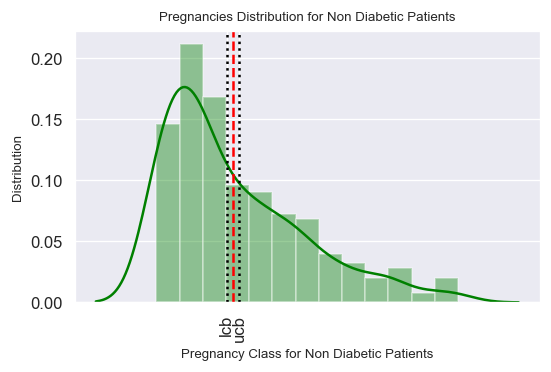

In [74]:
#let us make some figure to interpret the result
plt.figure(dpi=120,figsize=(5,3))
sns.distplot(dataframe_non_diabetic['Pregnancies'],color='green')
plt.axvline(x=3.0332622455725544,color = 'black',ls=':')
plt.axvline(x=3.5627377544274457,color = 'black',ls=':')
plt.axvline(x=mean_pregnancies_non_diabetic.best_estimate,color='red',ls='--')
plt.xticks([3.0332622455725544, 3.5627377544274457],['lcb','ucb'],rotation=90)
plt.xlabel('Pregnancy Class for Non Diabetic Patients',fontdict={'fontsize':8})
plt.ylabel('Distribution',fontdict={'fontsize':8})
plt.title('Pregnancies Distribution for Non Diabetic Patients',fontdict={'fontsize':8}) 
plt.show()

In [75]:
#doing diabetic and non-diabetic patients differ in mean pregnancies month
print("\nSample Information:\n")
new_dataframe.groupby('Outcome').describe()['Pregnancies'].transpose().loc[['mean','std'],:]


Sample Information:



Outcome,Diab,Non-Diab
mean,4.865672,3.298000
std,3.741239,3.017185


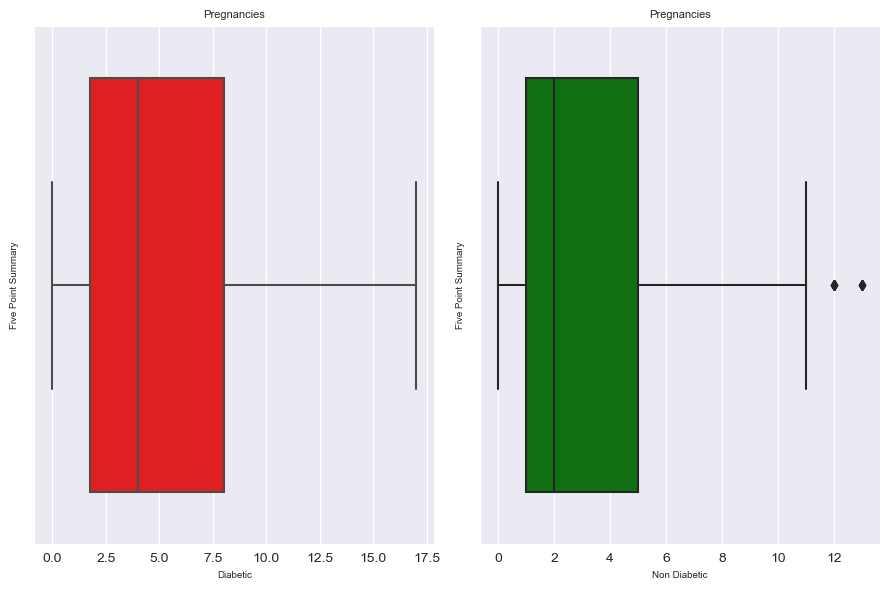

In [76]:
#let us look at variance of both category
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=100,figsize = (9,6))

p0 = sns.boxplot(dataframe_diabetic['Pregnancies'],ax=axes[0],orient='v',color = 'red')
axes[0].set_title('Pregnancies',fontdict={'fontsize':8})
axes[0].set_xlabel('Diabetic',fontdict={'fontsize':7})
axes[0].set_ylabel('Five Point Summary',fontdict={'fontsize':7})
plt.tight_layout()

p1 = sns.boxplot(dataframe_non_diabetic['Pregnancies'],ax=axes[1],orient='v',color='green')
axes[1].set_title('Pregnancies',fontdict={'fontsize':8})
axes[1].set_xlabel('Non Diabetic',fontdict={'fontsize':7})
axes[1].set_ylabel('Five Point Summary',fontdict={'fontsize':7})
plt.tight_layout()

In [78]:
a1 = dataframe_diabetic.Pregnancies.mean()
a2 = dataframe_non_diabetic.Pregnancies.mean()
stnd1 = dataframe_diabetic.Pregnancies.std()
stnd2 = dataframe_non_diabetic.Pregnancies.std()
b1 = dataframe_diabetic.shape[0]
b2 = dataframe_non_diabetic.shape[0]

In [79]:
mean_diffrent_preg = diffMean(a1,a2,stnd1,stnd2,b1,b2,1.98)
mean_diffrent_preg.pooledMean()

print("\nPrinting Calculations...")
print("Best point estimate for (μ1 − μ2 )", (mean_diffrent_preg.best_estimate1-mean_diffrent_preg.best_estimate2))
print("Estimated Standard Error for (μ1 − μ2 )",mean_diffrent_preg.pooled_estimated_se)
print("Margin of Error for (μ1 − μ2 )",mean_diffrent_preg.pooledMoe())
print("95% Confidence Interval for (μ1 − μ2 )",mean_diffrent_preg.pooledMean(),"\n")


Printing Calculations...
Best point estimate for (μ1 − μ2 ) 1.567671641791045
Estimated Standard Error for (μ1 − μ2 ) 0.4988975585853227
Margin of Error for (μ1 − μ2 ) 0.987817165998939
95% Confidence Interval for (μ1 − μ2 ) (0.579854475792106, 2.5554888077899838) 



In [81]:
#doing diabetic patients have higher mean pregnancies month than Non Diabetic Patients
import statsmodels.api as sm
z,p_value = sm.stats.ztest(dataframe_diabetic['Pregnancies'],dataframe_non_diabetic['Pregnancies'])
print("P-Value is:",p_value)

P-Value is: 3.006743856829293e-10
